In [40]:
import autograd.numpy as np
import pandas as pd

from matrix_operations import norm_matrix
from sklearn.model_selection import train_test_split
from KernelRegression import KernelRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import accuracy_score as acc

import matplotlib.pyplot as plt

import numpy as np1

In [2]:
from KF_parametric_autograd import KernelFlowsPAutograd

In [3]:
# Function to transform numerical to classes 

def pred_to_class(pred):
    pred[pred < 0.5] = 0
    pred[pred >= 0.5] = 1
    return pred

In [4]:
# Function that computes the average squared distance between data points
def compute_sigma_heuristic(X_train):
    distance_matrix = norm_matrix(X_train, X_train)
    sigma = 0
    k = 0
    for i in range(X_train.shape[0]):
        for j in range(i, X_train.shape[0]):
            k +=1
            sigma += distance_matrix[i,j]
        
        
    sigma = sigma/(k)    
    sigma = np.sqrt(sigma)

    mu = np.array([sigma])
    
    return mu

# K = 0

## Importing all the data

### Raw data

In [5]:
home_dir = "D:/Documents/University/MVA/Kernel Methods/mva-KMML-challenge/data/"
k = "0"
X_raw_train = pd.read_csv(home_dir+ "Xtr" + k + ".csv")
X_raw_train

,Id,seq
0,0,TCCTGTGCACATCTGCACCCCTGTTGTGGCCACAAAATGATCCGGC...
1,1,TTAAGTGTATATCTAATAATTTTTTTGCCTACATTCCTGTGTTACC...
2,2,GTGCTCAATTAGTTGCCTACAAATAGTAGCCTGGCACAGTGTAAGC...
3,3,CACCTGGAAAATACAAACAGGCGCAAGAAGAGTTAACCCACAGATC...
4,4,AAATCACTGCCTATCCTTGGGCCAAAAGGTTTCTACAGGAAGCTGC...
...,...,...
1995,1995,ACGCTTCGGCACGGCTGGCACGGGCTCCCTGAGGGGCTGTTGGAGA...
1996,1996,CCTGGCCCTTGGCTCTGCCCTGAAGACAACTCACTCAGGTGCATCC...
1997,1997,TCTTCTCTCTGTGTCCTCATGTGCCCTTTGCTCTGTGCACAGGCAT...
1998,1998,GGCACGGTGGCTCATGCCTGTAATCTTAGCACTTTGGGAGGCCAAG...


In [6]:
test_pd = pd.read_csv(home_dir+ "Xte" + k + ".csv")
test_pd

,Id,seq
0,0,AAGGCCGAGCCCGGCGCGGACGCAGGCGGCTCCGGGCGGGCTCAGC...
1,1,TCTGGGCTCTTAATGTAAAGGTTGCCACTGATGCTGTGTCACCAGC...
2,2,GCCCGCACCGCTGGGCTATTTTTAGCGTCCACTAAACTTAGCCGAC...
3,3,GAGGCGCTGGCAATGGACTAGGAAGCTCGGCTGCCGCTGCTACTGC...
4,4,GGCGAGACTCCATCTCTACAGAAAATTTTTTTAAAAATTAGCTGGA...
...,...,...
995,995,GGCATGGCAGGCCAATCAGAGTCTTCCCTGGGACCTTCTCTGGCAG...
996,996,CTTGTTCTGCAAAGGGAGGATATCTTGAAGCAGGGGCTAACAGGTC...
997,997,CCAGACGGAAGTGCATCATTTTGGCCACAGTGTCCCAGGTCGAAAC...
998,998,GAGGGAGTGGTCCTGGGGGGTCTCGAGGGCCATGGGGGGCACTGGA...


### Training

In [7]:
X_pd = pd.read_csv(home_dir+ "Xtr" + k +"_mat100.csv", header=None, delim_whitespace=True)
X_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.010870,0.010870,0.043478,0.010870,0.021739,0.021739,0.000000,0.010870,0.010870,0.010870,...,0.000000,0.032609,0.01087,0.010870,0.010870,0.000000,0.000000,0.010870,0.000000,0.01087
1,0.000000,0.000000,0.010870,0.010870,0.000000,0.010870,0.010870,0.000000,0.000000,0.000000,...,0.010870,0.010870,0.01087,0.021739,0.000000,0.010870,0.021739,0.032609,0.000000,0.00000
2,0.021739,0.010870,0.021739,0.000000,0.000000,0.000000,0.010870,0.010870,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.010870,0.000000,0.021739,0.000000,0.021739,0.021739,0.01087
3,0.021739,0.010870,0.043478,0.000000,0.000000,0.000000,0.010870,0.000000,0.000000,0.010870,...,0.021739,0.000000,0.00000,0.000000,0.000000,0.000000,0.010870,0.000000,0.000000,0.01087
4,0.021739,0.010870,0.010870,0.010870,0.010870,0.010870,0.032609,0.000000,0.010870,0.043478,...,0.010870,0.010870,0.00000,0.000000,0.010870,0.010870,0.032609,0.010870,0.021739,0.01087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.000000,0.010870,0.000000,0.010870,0.000000,0.021739,0.010870,0.032609,...,0.000000,0.010870,0.01087,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.00000
1996,0.010870,0.021739,0.000000,0.000000,0.000000,0.021739,0.010870,0.010870,0.021739,0.000000,...,0.021739,0.010870,0.00000,0.010870,0.000000,0.000000,0.000000,0.000000,0.010870,0.01087
1997,0.010870,0.000000,0.000000,0.000000,0.000000,0.010870,0.010870,0.010870,0.021739,0.000000,...,0.010870,0.010870,0.00000,0.000000,0.021739,0.000000,0.032609,0.032609,0.000000,0.00000
1998,0.010870,0.010870,0.000000,0.000000,0.021739,0.000000,0.010870,0.021739,0.000000,0.032609,...,0.032609,0.000000,0.00000,0.010870,0.000000,0.010870,0.000000,0.000000,0.000000,0.01087


In [8]:
X = X_pd.to_numpy()
X.shape

(2000, 100)

In [9]:
Y_pd = pd.read_csv(home_dir+ "Ytr" + k + ".csv")
Y_pd.head(10)

,Id,Bound
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,0
7,7,0
8,8,0
9,9,1


In [10]:
Y = Y_pd["Bound"].to_numpy()
Y.shape

(2000,)

In [11]:
Y[:10]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

### Test

In [12]:
X_test_pd = pd.read_csv(home_dir+ "Xte" +k + "_mat100.csv", header=None, delim_whitespace=True)
X_test_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.021739,0.000000,0.010870,0.021739,0.010870,0.010870,0.021739,0.010870,0.000000,...,0.000000,0.043478,0.000000,0.000000,0.010870,0.000000,0.000000,0.000000,0.032609,0.000000
1,0.000000,0.021739,0.000000,0.021739,0.021739,0.010870,0.010870,0.000000,0.010870,0.010870,...,0.021739,0.021739,0.000000,0.010870,0.010870,0.000000,0.010870,0.010870,0.032609,0.000000
2,0.000000,0.000000,0.010870,0.000000,0.000000,0.021739,0.000000,0.000000,0.010870,0.010870,...,0.010870,0.010870,0.010870,0.010870,0.010870,0.000000,0.021739,0.032609,0.000000,0.000000
3,0.021739,0.000000,0.000000,0.010870,0.010870,0.010870,0.000000,0.000000,0.021739,0.032609,...,0.010870,0.010870,0.000000,0.010870,0.043478,0.000000,0.021739,0.000000,0.000000,0.010870
4,0.010870,0.000000,0.010870,0.021739,0.010870,0.000000,0.000000,0.010870,0.000000,0.032609,...,0.000000,0.000000,0.000000,0.010870,0.010870,0.010870,0.010870,0.000000,0.010870,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.010870,0.043478,0.010870,0.021739,0.021739,0.021739,0.010870,0.000000,0.010870,...,0.000000,0.021739,0.010870,0.000000,0.010870,0.010870,0.010870,0.000000,0.010870,0.010870
996,0.000000,0.010870,0.000000,0.000000,0.021739,0.010870,0.043478,0.010870,0.000000,0.000000,...,0.010870,0.000000,0.000000,0.021739,0.000000,0.021739,0.010870,0.021739,0.000000,0.000000
997,0.000000,0.021739,0.032609,0.021739,0.000000,0.000000,0.021739,0.000000,0.010870,0.000000,...,0.021739,0.000000,0.010870,0.000000,0.010870,0.010870,0.000000,0.010870,0.010870,0.000000
998,0.010870,0.010870,0.000000,0.010870,0.021739,0.000000,0.010870,0.010870,0.010870,0.000000,...,0.000000,0.021739,0.010870,0.000000,0.000000,0.010870,0.010870,0.000000,0.010870,0.010870


In [13]:
X_test = X_test_pd.to_numpy()
print(X_test.shape)
X_test[0]

(1000, 100)


array([0.        , 0.02173913, 0.        , 0.01086957, 0.02173913,
       0.01086957, 0.01086957, 0.02173913, 0.01086957, 0.        ,
       0.        , 0.        , 0.        , 0.01086957, 0.        ,
       0.02173913, 0.        , 0.        , 0.01086957, 0.0326087 ,
       0.0326087 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0326087 , 0.0326087 ,
       0.        , 0.02173913, 0.        , 0.01086957, 0.01086957,
       0.02173913, 0.        , 0.        , 0.05434783, 0.        ,
       0.01086957, 0.        , 0.        , 0.02173913, 0.        ,
       0.        , 0.06521739, 0.02173913, 0.        , 0.        ,
       0.02173913, 0.        , 0.        , 0.01086957, 0.02173913,
       0.02173913, 0.01086957, 0.02173913, 0.01086957, 0.01086957,
       0.        , 0.02173913, 0.        , 0.01086957, 0.01086957,
       0.01086957, 0.01086957, 0.01086957, 0.0326087 , 0.        ,
       0.02173913, 0.01086957, 0.01086957, 0.        , 0.     

## Testing the soundness on a train and validation set

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size =0.2, shuffle = True, random_state = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1600, 100) (1600,) (400, 100) (400,)


In [15]:
# As a heuristic, we use the average squared distance between features for our sigma

"""
Computing sigma estimate
"""
mu = compute_sigma_heuristic(X_train)
print(mu)

[0.16879884]


### Fitting kernel Flows

In [20]:
gamma = 1/mu**2
reg = 1e-5

In [27]:
K = KernelFlowsPAutograd("RBF", mu)
mu_pred = K.fit(X_train, Y_train, 1000, optimizer = "Nesterov",  batch_size = 0.5, show_it = 100, reg = reg)

Iteration  0
Iteration  100
Iteration  200
Iteration  300
Iteration  400
Iteration  500
Iteration  600
Iteration  700
Iteration  800
Iteration  900


In [42]:
mu_pred

array([4.69896309])

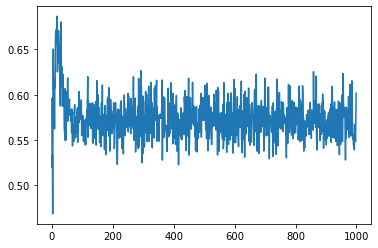

In [36]:
plt.plot(K.rho_values)

In [43]:
pred_KF = K.predict(X_val, reg = reg)

In [44]:
KR = KernelRegression("RBF", mu_pred)
KR.fit(X_train, Y_train,  reg = reg)
pred_KF_2 = KR.predict(X_val)

In [45]:
np1.testing.assert_almost_equal(pred_KF, pred_KF_2)

In [46]:
pred_KF = pred_to_class(pred_KF)
acc(pred_KF, Y_val)

0.595

In [47]:
KR = KernelRegression("RBF", mu)
KR.fit(X_train, Y_train,  reg = reg)
pred_val = KR.predict(X_val)

In [48]:
K = KernelRidge(alpha = reg, kernel = "rbf", gamma = gamma)
K.fit(X_train, Y_train)
pred_SK = K.predict(X_val)

In [50]:
# Checking that our implementation gives the same answer
np1.testing.assert_almost_equal(pred_SK, pred_val)

In [51]:
pred_val = pred_to_class(pred_val)

In [52]:
acc(pred_val, Y_val)

0.5775

## Final prediction on the test set

In [53]:
mu = compute_sigma_heuristic(X)
print(mu)

KR = KernelRegression("RBF", mu)
KR.fit(X, Y,  reg = reg)
pred_0 = KR.predict(X_test)

pred_0 = pred_to_class(pred_0)
pred_0 = np.vstack((np.arange(pred_0.shape[0]), pred_0)).T

[0.16989778]


In [63]:
pred_0.shape, mu

((1000, 2), array([0.16989778]))

In [64]:
K = KernelFlowsPAutograd("RBF", mu)
mu_pred_test = K.fit(X, Y, 1000, optimizer = "Nesterov",  batch_size = 0.5, show_it = 100, reg = reg)

print(mu_pred_test)

Iteration  0
Iteration  100
Iteration  200
Iteration  300
Iteration  400
Iteration  500
Iteration  600
Iteration  700
Iteration  800
Iteration  900
[4.87570636]


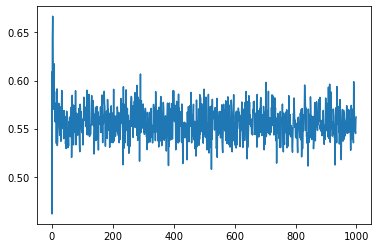

In [65]:
plt.plot(K.rho_values)

In [68]:
pred_KF_test_0 = K.predict(X_test, reg = reg)
pred_KF_test_0 = pred_to_class(pred_KF_test_0)

pred_KF_test_0 = np.vstack((np.arange(pred_KF_test_0.shape[0]), pred_KF_test_0)).T

In [69]:
pred_KF_test_0

array([[  0.,   1.],
       [  1.,   1.],
       [  2.,   1.],
       ...,
       [997.,   1.],
       [998.,   0.],
       [999.,   0.]])

# K = 1

## Importing all the data

### Raw data

In [72]:
home_dir = "D:/Documents/University/MVA/Kernel Methods/mva-KMML-challenge/data/"
k_int = 1
k = str(k_int)

X_raw_train = pd.read_csv(home_dir+ "Xtr" + k + ".csv")
X_raw_train

,Id,seq
0,2000,AGAAATGAAAGTCATCCAAATAGGAAGAGAAGGAGTCAAAATATCC...
1,2001,TTCTCTCCAGCACTCTTGTCACCAACTCACATACCATACAGTTTAC...
2,2002,ACAGCTGACAAGCAGAACCCAGGGTCACAAGGATCCCATTCATGTG...
3,2003,CAAACTTTTCTATGTTTAGCCATGTGTTAATTAATAAGAAATGTTC...
4,2004,CTTCGTGGTTGGTCAAGAACGGCAGGAGGTATTTGCCCATCGGTGC...
...,...,...
1995,3995,TCTTCCTCTGGAGTAGGTGGAGTTTATATCCCTGCTCTCCTCCCCT...
1996,3996,AATGAGATGTTATGCATATTTCAGATTTTTTTCATTTACAAAGGAA...
1997,3997,CAGCGCTCCCGCCCACCCTCCGGTCTCGGCGGCTCTCCAGAGCGTC...
1998,3998,CTGTGCGTAGAACAGAGAAAATTAGGAACTGTCCCTTTAATAAAAC...


In [73]:
test_pd = pd.read_csv(home_dir+ "Xte" + k + ".csv")
test_pd

,Id,seq
0,1000,GCCAGAATTTATAATGATTTCATTTTTTTTAAAACTTGATGCTCAA...
1,1001,ATGCCTCTAGACCCTTGCCCTACCCACATGTATTTCCTGCTGATGT...
2,1002,ACACGGTGCACCCAACTGAATTTAAACTCGGGAACAGTGTAGGCAG...
3,1003,TGCTGATAGTGTGAGCCACCATGCCCAGCCCAGATGTTTTTTTGAT...
4,1004,AGAGAAAAGCAGCTGTTTGGTTCACTGTTCTCATTAGCATTTATAT...
...,...,...
995,1995,CATATCCCAATTTGCCCACTAGAGGTAGCCATTATCTTGAAATCTT...
996,1996,CAAGAGCGAGACTCCTTCTCAAGAAAAAAAAAAAACCAACCAGTAG...
997,1997,CCAGGATGGGCTACAGAGCGAGACTCCGTCTCAAAGGAAAACAAAA...
998,1998,TGGAGGATGAACAGGAACAATACAACCCCAGGCTGAGCACAGTGCT...


### Train data

In [74]:
X_pd = pd.read_csv(home_dir+ "Xtr" + k +"_mat100.csv", header=None, delim_whitespace=True)
X_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.010870,0.010870,0.000000,0.021739,0.032609,0.021739,0.000000,0.021739,...,0.000000,0.021739,0.021739,0.065217,0.000000,0.000000,0.032609,0.043478,0.021739,0.010870
1,0.010870,0.000000,0.000000,0.000000,0.043478,0.010870,0.010870,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.021739,0.021739,0.010870,0.000000,0.000000,0.032609,0.021739,0.010870
2,0.021739,0.000000,0.000000,0.021739,0.000000,0.010870,0.021739,0.010870,0.000000,0.021739,...,0.010870,0.010870,0.000000,0.010870,0.000000,0.000000,0.021739,0.000000,0.021739,0.010870
3,0.000000,0.000000,0.000000,0.021739,0.000000,0.010870,0.000000,0.010870,0.000000,0.000000,...,0.021739,0.000000,0.010870,0.010870,0.000000,0.000000,0.010870,0.010870,0.021739,0.000000
4,0.000000,0.010870,0.000000,0.010870,0.000000,0.000000,0.010870,0.021739,0.000000,0.021739,...,0.000000,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,0.010870,0.021739,0.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.010870,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.032609,0.032609,0.010870,...,0.000000,0.032609,0.010870,0.010870,0.021739,0.021739,0.000000,0.000000,0.010870,0.021739
1996,0.021739,0.000000,0.000000,0.010870,0.054348,0.010870,0.021739,0.010870,0.000000,0.000000,...,0.010870,0.000000,0.010870,0.021739,0.010870,0.000000,0.000000,0.043478,0.010870,0.010870
1997,0.010870,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,0.000000,0.054348,0.043478,...,0.010870,0.010870,0.000000,0.000000,0.010870,0.141304,0.000000,0.021739,0.032609,0.032609
1998,0.021739,0.032609,0.032609,0.010870,0.021739,0.010870,0.010870,0.032609,0.000000,0.032609,...,0.000000,0.032609,0.010870,0.000000,0.000000,0.000000,0.021739,0.021739,0.000000,0.010870


In [75]:
X = X_pd.to_numpy()
X.shape

(2000, 100)

In [76]:
Y_pd = pd.read_csv(home_dir+ "Ytr" + k + ".csv")
Y_pd.head(10)

,Id,Bound
0,2000,0
1,2001,0
2,2002,1
3,2003,1
4,2004,1
5,2005,0
6,2006,0
7,2007,0
8,2008,1
9,2009,1


In [77]:
Y = Y_pd["Bound"].to_numpy()
Y.shape, Y[:10]

((2000,), array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64))

### Test data

In [78]:
X_test_pd = pd.read_csv(home_dir+ "Xte" +k + "_mat100.csv", header=None, delim_whitespace=True)
X_test_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.032609,0.010870,0.065217,0.010870,0.000000,0.010870,0.000000,0.00000,...,0.010870,0.000000,0.010870,0.043478,0.010870,0.000000,0.010870,0.000000,0.010870,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.00000,...,0.000000,0.032609,0.021739,0.000000,0.043478,0.000000,0.000000,0.000000,0.021739,0.032609
2,0.000000,0.032609,0.010870,0.000000,0.000000,0.000000,0.010870,0.010870,0.010870,0.01087,...,0.032609,0.010870,0.000000,0.010870,0.021739,0.000000,0.000000,0.000000,0.032609,0.010870
3,0.021739,0.000000,0.021739,0.010870,0.086957,0.000000,0.000000,0.000000,0.021739,0.00000,...,0.010870,0.000000,0.000000,0.021739,0.000000,0.000000,0.010870,0.010870,0.043478,0.000000
4,0.010870,0.032609,0.000000,0.010870,0.010870,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.010870,0.000000,0.010870,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.021739,0.000000,0.010870,0.000000,0.010870,0.010870,0.021739,0.000000,0.000000,0.01087,...,0.010870,0.000000,0.010870,0.010870,0.010870,0.000000,0.000000,0.021739,0.021739,0.000000
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.01087,...,0.000000,0.010870,0.010870,0.010870,0.010870,0.000000,0.097826,0.000000,0.000000,0.021739
997,0.010870,0.010870,0.032609,0.043478,0.000000,0.010870,0.000000,0.021739,0.010870,0.01087,...,0.010870,0.010870,0.000000,0.021739,0.010870,0.000000,0.108696,0.010870,0.000000,0.010870
998,0.010870,0.010870,0.021739,0.000000,0.000000,0.021739,0.010870,0.032609,0.010870,0.01087,...,0.000000,0.000000,0.010870,0.010870,0.021739,0.010870,0.032609,0.000000,0.021739,0.000000


In [79]:
X_test = X_test_pd.to_numpy()
print(X_test.shape)

(1000, 100)


## Testing the soundness on a train and validation set

In [80]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size =0.2, shuffle = True, random_state = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1600, 100) (1600,) (400, 100) (400,)


In [81]:
# As a heuristic, we use the average squared distance between features for our sigma

"""
Computing sigma estimate
"""
mu = compute_sigma_heuristic(X_train)
print(mu)

[0.17206958]


In [82]:
gamma = 1/mu**2
reg = 1e-5

In [83]:
KR = KernelRegression("RBF", mu)
KR.fit(X_train, Y_train,  reg = reg)
pred_val = KR.predict(X_val)

In [84]:
K = KernelRidge(alpha = reg, kernel = "rbf", gamma = gamma)
K.fit(X_train, Y_train)
pred_SK = K.predict(X_val)

In [87]:
# Checking that our implementation gives the same answer
np1.testing.assert_almost_equal(pred_SK, pred_val)

In [88]:
pred_val = pred_to_class(pred_val)

In [89]:
acc(pred_val, Y_val)

0.5675

In [90]:
K = KernelFlowsPAutograd("RBF", mu)
mu_pred = K.fit(X_train, Y_train, 200, optimizer = "Nesterov",  batch_size = 0.5, show_it = 100, reg = reg)

Iteration  0
Iteration  100


In [95]:
mu_pred

array([-4.06266163])

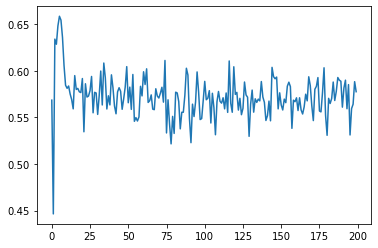

In [92]:
plt.plot(K.rho_values)

In [93]:
pred_KF = K.predict(X_val, reg = reg)

In [94]:
pred_KF = pred_to_class(pred_KF)
acc(pred_KF, Y_val)

0.56

## Final prediction on the test set

In [96]:
mu = compute_sigma_heuristic(X)
print(mu)

KR = KernelRegression("RBF", mu)
KR.fit(X, Y,  reg = reg)
pred_1 = KR.predict(X_test)

pred_1 = pred_to_class(pred_1)
pred_1 = np.vstack((np.arange(pred_1.shape[0])+ 1000*k_int, pred_1)).T

[0.17152814]


In [97]:
pred_0, pred_1

(array([[  0.,   1.],
        [  1.,   0.],
        [  2.,   1.],
        ...,
        [997.,   1.],
        [998.,   1.],
        [999.,   0.]]),
 array([[1.000e+03, 0.000e+00],
        [1.001e+03, 1.000e+00],
        [1.002e+03, 1.000e+00],
        ...,
        [1.997e+03, 0.000e+00],
        [1.998e+03, 0.000e+00],
        [1.999e+03, 1.000e+00]]))

In [98]:
K = KernelFlowsPAutograd("RBF", mu)
mu_pred_test = K.fit(X, Y, 200, optimizer = "Nesterov",  batch_size = 0.5, show_it = 100, reg = reg)

print(mu_pred_test)

Iteration  0
Iteration  100
[-3.97884473]


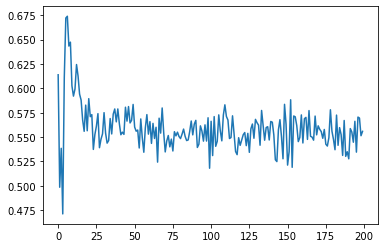

In [100]:
plt.plot(K.rho_values)

In [104]:
pred_KF_test_1 = K.predict(X_test, reg = reg)
pred_KF_test_1 = pred_to_class(pred_KF_test_1)

pred_KF_test_1 = np.vstack((np.arange(pred_KF_test_1.shape[0])+ 1000*k_int, pred_KF_test_1)).T

In [106]:
pred_KF_test_1, pred_KF_test_0

(array([[1.000e+03, 0.000e+00],
        [1.001e+03, 1.000e+00],
        [1.002e+03, 1.000e+00],
        ...,
        [1.997e+03, 0.000e+00],
        [1.998e+03, 0.000e+00],
        [1.999e+03, 1.000e+00]]),
 array([[  0.,   1.],
        [  1.,   1.],
        [  2.,   1.],
        ...,
        [997.,   1.],
        [998.,   0.],
        [999.,   0.]]))

# K = 2

## Importing all the data

### Raw data

In [107]:
home_dir = "D:/Documents/University/MVA/Kernel Methods/mva-KMML-challenge/data/"
k_int = 2
k = str(k_int)

X_raw_train = pd.read_csv(home_dir+ "Xtr" + k + ".csv")
X_raw_train

,Id,seq
0,4000,GTGCCGACGCAGCGGTGTTGCACCTCCCTCTCCGGCTCTGCTGCCC...
1,4001,CCTGAGTTTGGTGTTCTGTGGAATTATTGAACCTAAGTAGGTAGTG...
2,4002,CCAGGTGCTTACCATTATCATGTAAGTTCTCTAACTGTTTCATGTG...
3,4003,AGAGCGGTGTGGGGGTCACTCAAGAGAACGTGCTGTACCTTGTCAG...
4,4004,CCCCAGGGGCAGGCGGGCTAGCCCCCCCATCATATGCAAATCATGG...
...,...,...
1995,5995,GCTGCCTCTTGGACATCAGACCAAGGCTTACATTCTGAATCCACAG...
1996,5996,CGGTGGCTTATGCCTGTAATGCCAGCACTTTGGAAGGCCGAGGTGG...
1997,5997,GACAACAGCCAGCAGGAACCACCTGTGCTGGGCCCCCGCAGCGAGG...
1998,5998,ACTTGTATGAGGGCAAGACCAACTTCTTCAAAGCCAGTCACTCAAA...


In [108]:
test_pd = pd.read_csv(home_dir+ "Xte" + k + ".csv")
test_pd

,Id,seq
0,2000,TGAGCAGCTCCTGCGGAACCTCTGGCTGGCACAGAGCCCGGGGGCG...
1,2001,CATGCACCACCATGCCTGGCTAAGTTTTGTGTTTTTAGTAGAGACG...
2,2002,TCTGGTCCGTGCAGGCACAACCCAGGCTCCGGCTGGGGGTGGAGTA...
3,2003,TTAGGGATGAAGTGAAAATTTCAAAAGCCCCCTTTTTCAGGGTCTG...
4,2004,TGCAGATGCAAATGCAGGAAACTCCAGGCCATGTGTGGACTGAATG...
...,...,...
995,2995,CCCGCAAGCTGAGGGAGCCGGCTCTGGCCTTGGCCAGTCCAGAAAG...
996,2996,GGGTTTCCCTGTGTTGCCCAGGCTAGTCTTAAATTCCTGGGCTCAA...
997,2997,AGTGGTGCAATCTTGGCTCACTGCAACATCCGCCTCCCAGGTTCAA...
998,2998,CAGGTAGATCACCTGAGGTCAGTTCGAGACCAGCCTGGCCAATGTG...


### Train

In [109]:
X_pd = pd.read_csv(home_dir+ "Xtr" + k +"_mat100.csv", header=None, delim_whitespace=True)
X_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.021739,0.010870,0.021739,0.021739,0.032609,0.021739,0.010870,0.010870,0.01087,0.000000,...,0.000000,0.010870,0.010870,0.010870,0.032609,0.000000,0.000000,0.000000,0.021739,0.000000
1,0.010870,0.000000,0.000000,0.000000,0.010870,0.010870,0.010870,0.010870,0.01087,0.043478,...,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.000000,0.010870,0.000000
2,0.000000,0.032609,0.032609,0.021739,0.032609,0.010870,0.010870,0.010870,0.00000,0.021739,...,0.010870,0.010870,0.021739,0.021739,0.000000,0.010870,0.010870,0.010870,0.010870,0.010870
3,0.010870,0.021739,0.010870,0.010870,0.021739,0.010870,0.000000,0.000000,0.00000,0.021739,...,0.000000,0.010870,0.021739,0.010870,0.021739,0.010870,0.010870,0.000000,0.021739,0.000000
4,0.000000,0.000000,0.010870,0.010870,0.032609,0.010870,0.021739,0.000000,0.01087,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.032609,0.010870,0.021739,0.010870,0.000000,0.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.021739,0.021739,0.010870,0.010870,0.010870,0.010870,0.010870,0.021739,0.00000,0.021739,...,0.000000,0.000000,0.010870,0.010870,0.010870,0.043478,0.000000,0.043478,0.010870,0.010870
1996,0.000000,0.000000,0.000000,0.010870,0.010870,0.021739,0.000000,0.010870,0.01087,0.021739,...,0.021739,0.010870,0.032609,0.021739,0.000000,0.021739,0.010870,0.010870,0.000000,0.032609
1997,0.000000,0.021739,0.000000,0.010870,0.000000,0.000000,0.010870,0.032609,0.01087,0.010870,...,0.000000,0.010870,0.000000,0.000000,0.021739,0.000000,0.000000,0.010870,0.021739,0.000000
1998,0.010870,0.000000,0.021739,0.010870,0.000000,0.010870,0.010870,0.021739,0.00000,0.000000,...,0.000000,0.000000,0.021739,0.010870,0.000000,0.032609,0.000000,0.000000,0.000000,0.000000


In [110]:
X = X_pd.to_numpy()
X.shape

(2000, 100)

In [111]:
Y_pd = pd.read_csv(home_dir+ "Ytr" + k + ".csv")
Y_pd.head(10)

,Id,Bound
0,4000,1
1,4001,1
2,4002,1
3,4003,0
4,4004,1
5,4005,1
6,4006,0
7,4007,0
8,4008,0
9,4009,0


In [112]:
Y = Y_pd["Bound"].to_numpy()
Y.shape, Y[:10]

((2000,), array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64))

### Test data

In [113]:
X_test_pd = pd.read_csv(home_dir+ "Xte" +k + "_mat100.csv", header=None, delim_whitespace=True)
X_test_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.021739,0.021739,0.000000,0.010870,0.000000,0.021739,0.021739,0.032609,0.010870,0.000000,...,0.000000,0.010870,0.00000,0.021739,0.00000,0.000000,0.021739,0.010870,0.021739,0.000000
1,0.000000,0.010870,0.021739,0.010870,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,...,0.010870,0.010870,0.01087,0.000000,0.01087,0.010870,0.000000,0.021739,0.000000,0.010870
2,0.021739,0.021739,0.010870,0.021739,0.032609,0.010870,0.000000,0.000000,0.010870,0.021739,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.010870,0.021739,0.000000
3,0.000000,0.010870,0.021739,0.010870,0.021739,0.000000,0.010870,0.000000,0.010870,0.010870,...,0.010870,0.010870,0.00000,0.000000,0.00000,0.000000,0.010870,0.010870,0.000000,0.010870
4,0.010870,0.010870,0.010870,0.010870,0.021739,0.010870,0.010870,0.010870,0.000000,0.021739,...,0.010870,0.021739,0.00000,0.000000,0.00000,0.010870,0.000000,0.000000,0.010870,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.010870,0.000000,0.021739,0.000000,0.010870,0.010870,0.000000,...,0.000000,0.010870,0.00000,0.000000,0.00000,0.000000,0.010870,0.000000,0.000000,0.021739
996,0.021739,0.010870,0.021739,0.010870,0.021739,0.010870,0.000000,0.010870,0.000000,0.010870,...,0.010870,0.043478,0.01087,0.000000,0.00000,0.000000,0.000000,0.000000,0.010870,0.000000
997,0.010870,0.010870,0.010870,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021739,0.010870,0.01087,0.000000,0.00000,0.000000,0.000000,0.000000,0.010870,0.000000
998,0.010870,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,...,0.010870,0.010870,0.01087,0.010870,0.00000,0.010870,0.010870,0.000000,0.000000,0.021739


In [114]:
X_test = X_test_pd.to_numpy()
print(X_test.shape)

(1000, 100)


## Testing the soundness on a train and validation set

In [124]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size =0.2, shuffle = True, random_state = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1600, 100) (1600,) (400, 100) (400,)


In [125]:
# As a heuristic, we use the average squared distance between features for our sigma

"""
Computing sigma estimate
"""
mu = compute_sigma_heuristic(X_train)
print(mu)

[0.16608455]


In [126]:
gamma = 1/mu**2
reg = 1e-5

In [127]:
KR = KernelRegression("RBF", mu)
KR.fit(X_train, Y_train,  reg = reg)
pred_val = KR.predict(X_val)

In [128]:
K = KernelRidge(alpha = reg, kernel = "rbf", gamma = gamma)
K.fit(X_train, Y_train)
pred_SK = K.predict(X_val)

In [129]:
# Checking that our implementation gives the same answer
np1.testing.assert_almost_equal(pred_SK, pred_val)

In [130]:
pred_val = pred_to_class(pred_val)

In [131]:
acc(pred_val, Y_val)

0.685

In [132]:
K = KernelFlowsPAutograd("RBF", mu)
mu_pred = K.fit(X_train, Y_train, 200, optimizer = "Nesterov",  batch_size = 0.5, show_it = 100, reg = reg)

Iteration  0
Iteration  100


[-3.86402499]


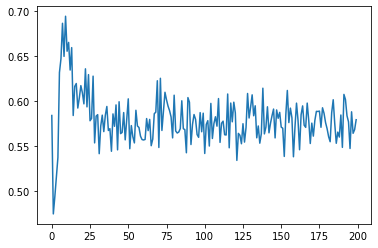

In [134]:
print(mu_pred)

plt.plot(K.rho_values)

In [135]:
pred_KF = K.predict(X_val, reg = reg)

pred_KF = pred_to_class(pred_KF)
acc(pred_KF, Y_val)

0.7175

## Final prediction on the test set

In [136]:
mu = compute_sigma_heuristic(X)
print(mu)

KR = KernelRegression("RBF", mu)
KR.fit(X, Y,  reg = reg)
pred_2 = KR.predict(X_test)

pred_2 = pred_to_class(pred_2)
pred_2 = np.vstack((np.arange(pred_2.shape[0])+ 1000*k_int, pred_2)).T

[0.16643195]


In [137]:
pred_0, pred_1, pred_2

(array([[  0.,   1.],
        [  1.,   0.],
        [  2.,   1.],
        ...,
        [997.,   1.],
        [998.,   1.],
        [999.,   0.]]),
 array([[1.000e+03, 0.000e+00],
        [1.001e+03, 1.000e+00],
        [1.002e+03, 1.000e+00],
        ...,
        [1.997e+03, 0.000e+00],
        [1.998e+03, 0.000e+00],
        [1.999e+03, 1.000e+00]]),
 array([[2.000e+03, 1.000e+00],
        [2.001e+03, 0.000e+00],
        [2.002e+03, 0.000e+00],
        ...,
        [2.997e+03, 0.000e+00],
        [2.998e+03, 0.000e+00],
        [2.999e+03, 1.000e+00]]))

In [138]:
K = KernelFlowsPAutograd("RBF", mu)
mu_pred_test = K.fit(X, Y, 200, optimizer = "Nesterov",  batch_size = 0.5, show_it = 100, reg = reg)

print(mu_pred_test)

Iteration  0
Iteration  100
[-3.86287225]


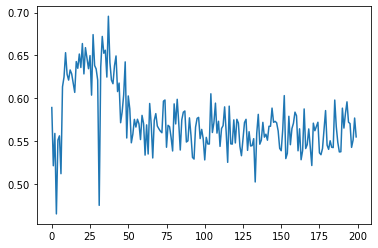

In [139]:
plt.plot(K.rho_values)

In [140]:
pred_KF_test_2 = K.predict(X_test, reg = reg)
pred_KF_test_2 = pred_to_class(pred_KF_test_2)

pred_KF_test_2 = np.vstack((np.arange(pred_KF_test_2.shape[0])+ 1000*k_int, pred_KF_test_2)).T

In [141]:
pred_KF_test_2, pred_KF_test_1, pred_KF_test_0

(array([[2.000e+03, 0.000e+00],
        [2.001e+03, 0.000e+00],
        [2.002e+03, 1.000e+00],
        ...,
        [2.997e+03, 0.000e+00],
        [2.998e+03, 0.000e+00],
        [2.999e+03, 1.000e+00]]),
 array([[1.000e+03, 0.000e+00],
        [1.001e+03, 1.000e+00],
        [1.002e+03, 1.000e+00],
        ...,
        [1.997e+03, 0.000e+00],
        [1.998e+03, 0.000e+00],
        [1.999e+03, 1.000e+00]]),
 array([[  0.,   1.],
        [  1.,   1.],
        [  2.,   1.],
        ...,
        [997.,   1.],
        [998.,   0.],
        [999.,   0.]]))

In [143]:
np1.testing.assert_almost_equal(pred_KF_test_2, pred_KF_test_1)

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 1493 / 2000 (74.7%)
Max absolute difference: 1000.
Max relative difference: 1.
 x: array([[2.000e+03, 0.000e+00],
       [2.001e+03, 0.000e+00],
       [2.002e+03, 1.000e+00],...
 y: array([[1.000e+03, 0.000e+00],
       [1.001e+03, 1.000e+00],
       [1.002e+03, 1.000e+00],...

In [144]:
np1.testing.assert_almost_equal(pred_KF_test_2, pred_KF_test_0)

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 1482 / 2000 (74.1%)
Max absolute difference: 2000.
Max relative difference: 2000.
 x: array([[2.000e+03, 0.000e+00],
       [2.001e+03, 0.000e+00],
       [2.002e+03, 1.000e+00],...
 y: array([[  0.,   1.],
       [  1.,   1.],
       [  2.,   1.],...

In [145]:
np1.testing.assert_almost_equal(pred_KF_test_0, pred_KF_test_1)

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 1515 / 2000 (75.8%)
Max absolute difference: 1000.
Max relative difference: 1.
 x: array([[  0.,   1.],
       [  1.,   1.],
       [  2.,   1.],...
 y: array([[1.000e+03, 0.000e+00],
       [1.001e+03, 1.000e+00],
       [1.002e+03, 1.000e+00],...

# Concatenating the whole predictions

In [146]:
final_pred = np.vstack((pred_KF_test_0, pred_KF_test_1, pred_KF_test_2))
print(final_pred.shape)

(3000, 2)


In [147]:
pd.DataFrame(final_pred, columns = ["Id", "Bound"]).to_csv("KF_pred.csv")